In [1602]:
import kagglehub
from tqdm import tqdm

In [1603]:
path = kagglehub.dataset_download("justanotherjason/flashpoint-ukraine-dataset", path="fud.gpkg")


In [1604]:
path

'/home/grim/.cache/kagglehub/datasets/justanotherjason/flashpoint-ukraine-dataset/versions/1/fud.gpkg'

In [1605]:
import geopandas as gpd

In [1606]:
gdf = gpd.read_file(path)

In [1607]:
gdf

,f_lat,f_lng,f_bright,f_scan,f_track,date,f_acqtime,f_sat,f_inst,f_conf,...,a_type,a_event,a_subevent,a_location,a_lat,a_lng,a_geoprec,h_adm_en,h_adm_ua,geometry
0,48.06239,37.60643,332.07,0.66,0.73,2024-07-28,1130,N21,VIIRS,n,...,Political violence,Explosions/Remote violence,Air/drone strike,Vodyane,48.0960,37.6666,2.0,Ocheretynska,Очеретинська,"MULTIPOLYGON (((37.81759 48.36787, 37.81779 48..."
1,47.51498,35.83017,306.70,0.41,0.37,2024-07-09,2350,N20,VIIRS,n,...,Political violence,Explosions/Remote violence,Air/drone strike,Novodanylivka,47.5242,35.8235,1.0,Novodanylivka,Новоданилівка,"MULTIPOLYGON (((35.81086 47.54522, 35.81271 47..."
2,51.60208,34.06103,297.22,0.47,0.40,2024-09-16,0013,N20,VIIRS,n,...,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Vovkivka,51.5200,34.2598,1.0,Shalyhynska,Шалигинська,"MULTIPOLYGON (((34.29189 51.48489, 34.28394 51..."
3,48.38680,37.84781,330.63,0.42,0.37,2024-08-15,1002,N20,VIIRS,l,...,Political violence,Battles,Armed clash,Toretsk,48.3934,37.8453,2.0,Toretsk,Торецьк,"MULTIPOLYGON (((37.86815 48.4105, 37.86829 48...."
4,49.77481,37.71021,345.49,0.43,0.38,2023-09-22,1028,N,VIIRS,n,...,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Kucherivka,49.7182,37.6713,2.0,Petropavlivska,Петропавлівська,"MULTIPOLYGON (((37.9515 49.73075, 37.95159 49...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135045,47.87373,33.41956,298.59,0.39,0.37,2021-09-12,2357,N,VIIRS,n,...,None,None,None,None,NaN,NaN,NaN,None,None,None
135046,47.15536,37.56606,350.99,0.38,0.43,2020-09-12,1045,N,VIIRS,n,...,None,None,None,None,NaN,NaN,NaN,None,None,None
135047,47.23802,31.74757,353.27,0.40,0.60,2020-09-20,1136,N,VIIRS,n,...,None,None,None,None,NaN,NaN,NaN,None,None,None
135048,47.15641,37.53461,304.65,0.51,0.41,2021-03-04,2356,N,VIIRS,n,...,None,None,None,None,NaN,NaN,NaN,None,None,None


In [1608]:
gdf.geometry

0         MULTIPOLYGON (((37.81759 48.36787, 37.81779 48...
1         MULTIPOLYGON (((35.81086 47.54522, 35.81271 47...
2         MULTIPOLYGON (((34.29189 51.48489, 34.28394 51...
3         MULTIPOLYGON (((37.86815 48.4105, 37.86829 48....
4         MULTIPOLYGON (((37.9515 49.73075, 37.95159 49....
                                ...                        
135045                                                 None
135046                                                 None
135047                                                 None
135048                                                 None
135049                                                 None
Name: geometry, Length: 135050, dtype: geometry

In [1609]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## EDA

A significant amount of probing, cleaning sorting and joining was done to build the dataset. Don't repeat that analysis, just review the EDA notebook for the Ukraine dataset. What remains to understand here that's relevant to prediction? 

- confirm geographic distribution of events 
- review balance of classes and subclasses (event types)
- clarify what is an input to prediction and what ends up being a label
- look at time series distribution 
- understand what supplemental datasets are essentialy to prediction - elevation data e.g. 
- figure out how to split data ... temporally seems insufficient... like with weather events, the goal is to preduct how a series of events concludes, or how the priors influence the posterior. If I isolate events temporally, the predictions end up IN the test/train data. 


In [1610]:
gdf['location'] = gpd.points_from_xy(y=gdf.f_lat, x=gdf.f_lng)
gdf.set_geometry('location', inplace=True)

In [1611]:
toretsk = gdf[gdf.a_location == 'Toretsk']
toretsk

,f_lat,f_lng,f_bright,f_scan,f_track,date,f_acqtime,f_sat,f_inst,f_conf,...,a_event,a_subevent,a_location,a_lat,a_lng,a_geoprec,h_adm_en,h_adm_ua,geometry,location
3,48.38680,37.84781,330.63,0.42,0.37,2024-08-15,1002,N20,VIIRS,l,...,Battles,Armed clash,Toretsk,48.3934,37.8453,2.0,Toretsk,Торецьк,"MULTIPOLYGON (((37.86815 48.4105, 37.86829 48....",POINT (37.84781 48.3868)
88,48.39430,37.86705,301.20,0.51,0.49,2024-09-22,2254,N21,VIIRS,n,...,Battles,Armed clash,Toretsk,48.3934,37.8453,2.0,Toretsk,Торецьк,"MULTIPOLYGON (((37.86815 48.4105, 37.86829 48....",POINT (37.86705 48.3943)
92,48.40821,37.81406,343.01,0.48,0.48,2024-07-06,1051,N20,VIIRS,n,...,Battles,Armed clash,Toretsk,48.3934,37.8453,2.0,Toretsk,Торецьк,"MULTIPOLYGON (((37.86815 48.4105, 37.86829 48....",POINT (37.81406 48.40821)
258,48.41077,37.86689,331.18,0.38,0.36,2024-08-25,1013,N20,VIIRS,l,...,Battles,Armed clash,Toretsk,48.3934,37.8453,2.0,Toretsk,Торецьк,"MULTIPOLYGON (((37.86815 48.4105, 37.86829 48....",POINT (37.86689 48.41077)
274,48.39269,37.85576,296.36,0.42,0.61,2024-09-07,2233,N21,VIIRS,n,...,Battles,Armed clash,Toretsk,48.3934,37.8453,2.0,Toretsk,Торецьк,"MULTIPOLYGON (((37.86815 48.4105, 37.86829 48....",POINT (37.85576 48.39269)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67285,48.39804,37.86902,332.19,0.53,0.42,2024-09-22,1041,N21,VIIRS,n,...,Battles,Armed clash,Toretsk,48.3934,37.8453,2.0,Toretsk,Торецьк,"MULTIPOLYGON (((37.86815 48.4105, 37.86829 48....",POINT (37.86902 48.39804)
67302,48.37680,37.85487,330.26,0.50,0.65,2024-08-18,0905,N20,VIIRS,n,...,Battles,Armed clash,Toretsk,48.3934,37.8453,2.0,Toretsk,Торецьк,"MULTIPOLYGON (((37.86815 48.4105, 37.86829 48....",POINT (37.85487 48.3768)
67344,48.39898,37.82941,298.82,0.42,0.61,2024-09-15,2233,N20,VIIRS,n,...,Battles,Armed clash,Toretsk,48.3934,37.8453,2.0,Toretsk,Торецьк,"MULTIPOLYGON (((37.86815 48.4105, 37.86829 48....",POINT (37.82941 48.39898)
67387,48.37939,37.83700,330.14,0.39,0.36,2024-09-23,1019,N21,VIIRS,l,...,Battles,Armed clash,Toretsk,48.3934,37.8453,2.0,Toretsk,Торецьк,"MULTIPOLYGON (((37.86815 48.4105, 37.86829 48....",POINT (37.837 48.37939)


In [1612]:
# TODO first for jupyter, second for vscode
#%matplotlib widget
%matplotlib inline

In [1613]:
import matplotlib.pyplot as plt 
import numpy as np

<Axes: >

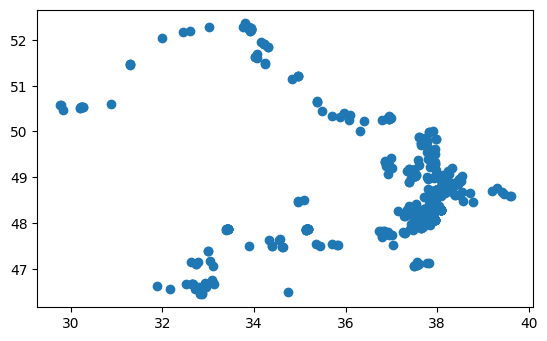

In [1614]:
gdf.head(500).plot()

In [1615]:
def temporal_scatter(gdf, n_dates=10):
    """
    Create a scatter plot of x,ys (presumed to be the active geometry in the supplied DF)
    using a date column. 

    NOTE: Geopandas and matplotlib maneuvering with help from gpt-4o: 
    https://chatgpt.com/share/688cddab-ae9c-8013-ac1a-6b9211e72971
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    dates = sorted(gdf['date'].unique())
    for i, date in enumerate(dates):
        if i >= n_dates:
            break 

        slice_df = gdf[gdf['date'] == date]
        xs = slice_df.geometry.x
        ys = slice_df.geometry.y
        zs = np.full_like(xs, i)
        ax.scatter(xs, ys, zs, label=f'Date {date}', depthshade=True)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Date')
    plt.legend()
    plt.tight_layout()
    plt.show()


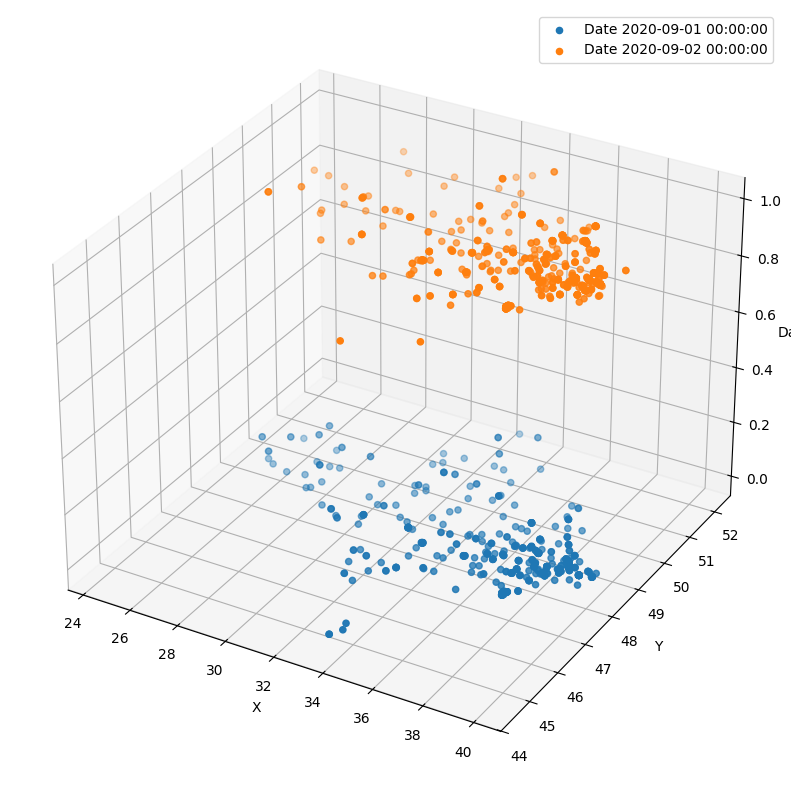

In [1616]:
temporal_scatter(gdf, n_dates=2)

In [1617]:
#TODO: better name for the admin boundary than 'geometry' ... confusing
gdf.set_geometry('geometry', inplace=True)

In [1618]:
import plotly.graph_objects as go

In [1619]:
type(gdf.iloc[0].geometry)

shapely.geometry.multipolygon.MultiPolygon

In [1620]:
def plot_temporal_polygons(gdf): 
    fig = go.Figure()

    for t in range(1):
        poly = gdf.iloc[t].geometry
        x, y = poly.exterior.xy
        z = [t] * len(x)
        fig.add_trace(go.Scatter3d(
            x=x, y=y, z=z,
            mode='lines',
            line=dict(width=4),
            name=f"Time {t}"
        ))

    fig.update_layout(scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Time'
    ))
    fig.show()

<Axes: >

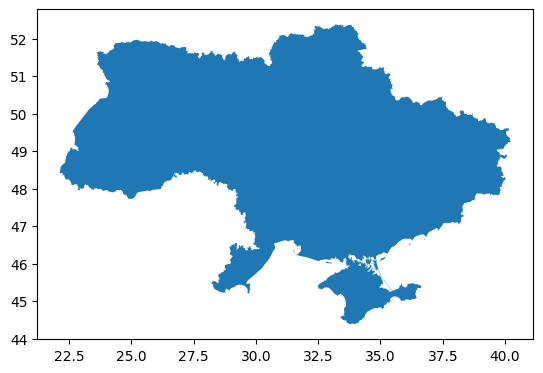

In [1621]:
ukraine_admin_gdb = "../data/ukr_admbnd_sspe_20240416_AB_GDB.gdb"    
# ukraine_level_4_lyr = 3
# ukraine_level_3_lyr = 4
# ukraine_level_2_lyr = 5
# ukraine_level_1_lyr = 6
# ukraine_level_0_lyr = 7
admin = gpd.read_file(ukraine_admin_gdb, layer=7)
admin.plot()

In [1622]:
admin.iloc[0]

ADM0_EN                                                   Ukraine
ADM0_UA                                                   Україна
ADM0_RU                                                   Украина
ADM0_PCODE                                                     UA
date                                    2024-03-18 00:00:00+00:00
validOn                                 2024-04-16 00:00:00+00:00
validTo                                                       NaT
AREA_SQKM                                           600217.274417
Shape_Length                                           112.065036
Shape_Area                                              73.804151
geometry        MULTIPOLYGON (((30.206624202000057 45.25740417...
Name: 0, dtype: object

In [1623]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [1624]:
def make_box(x=30.0, y=47.0, z=0, w=2, h=4):
    """
    Create a box to illustrate our spatiotemporal cross-validation (STCV) strategy 

    NOTE: setup of box geometry suitable for matplotlib courtesy of gpt-4o, part of the 
    larger conversation on rendering spatial data with matplotlib et al: 
    https://chatgpt.com/share/688cddab-ae9c-8013-ac1a-6b9211e72971
    """ 

    # Make boundaries 
    x0, x1 = x, x+w
    y0, y1 = y, y+w
    z0, z1 = z, z+h

    # Build the corners 
    corners = [
        [x0, y0, z0],
        [x1, y0, z0],
        [x1, y1, z0],
        [x0, y1, z0],
        [x0, y0, z1],
        [x1, y0, z1],
        [x1, y1, z1],
        [x0, y1, z1],
    ]

    # Make assoc'd faces 
    faces = [
        [corners[0], corners[1], corners[2], corners[3]],  # bottom
        [corners[4], corners[5], corners[6], corners[7]],  # top
        [corners[0], corners[1], corners[5], corners[4]],  # front
        [corners[2], corners[3], corners[7], corners[6]],  # back
        [corners[1], corners[2], corners[6], corners[5]],  # right
        [corners[0], corners[3], corners[7], corners[4]],  # left
    ]

    return faces 

In [1625]:
def render_box(box): 
    """
    Helper to visualize a box constructed by make_box
    """                
    block_color = (1, 0, 0, 0.3)  # semi-transparent red, courtesy of gpt-4o

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    box = Poly3DCollection(box, facecolors=(1, 0, 0, 0.3), edgecolors='r')
    ax.add_collection3d(box)

    # Set axis limits and labels
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_zlim(0, 5)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.tight_layout()

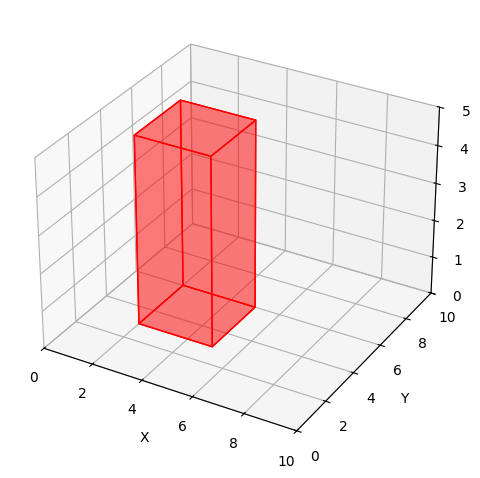

In [1626]:
render_box(make_box(2,3,0,3,5))

In [1627]:
def set_axes_range(ax): 
    """
    We need to adjust the axes range to keep things proportional, matplotlib doesn't do this by 
    default. 
    NOTE: This hack courtesy of gpt-4o. See link in make_box()
    """
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    ax.set_xlim(x_limits[0], x_limits[1])
    ax.set_ylim(y_limits[0], y_limits[1])
    ax.set_zlim(z_limits[0], z_limits[1])

In [1628]:
def temporal_scatter_w_poly(gdf, geom, n_dates=3, color_map='OrRd', box=None, edge='r'): 
    """
    Plot x/y coordinates for date groupings with reference geometry for the 
    first n dates (oldest to newest). Presumes we have a 'date' column in the 
    supplied df. Also accepts a set of faces to plot in the box param, constructed
    ideally w/ make_box(). 
    """

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    dates = sorted(gdf['date'].unique())
    
    cmap = cm.get_cmap(color_map, n_dates)
    norm = mcolors.Normalize(vmin=0, vmax=n_dates)
    ix_to_color = {t: cmap(norm(t)) for t in range(n_dates)}
    
    for i, date in enumerate(dates):    
        if i >= n_dates:
            break 
        
        color = ix_to_color[i]
    
        # Plot polygons associated with whatever geometry we've been given    
        polys = list(geom.geoms)
    
        for poly in polys:
            x, y = poly.exterior.xy
            z = [i] * len(x)
            verts = [list(zip(x, y, z))]
            ax.add_collection3d(Poly3DCollection(verts, alpha=0.5, facecolor=color))
        
        # Slice DF along dates
        date_df = gdf[gdf['date'] == date]
    
        # Plot associated detections     
        xs = date_df.location.x
        ys = date_df.location.y
        zs = np.full_like(xs, i)
        ax.scatter(xs, ys, zs, color=color, label=f'Date {date}', depthshade=True)
    
    # If we've been given a prismbox to render, shim it in there
    if box is not None: 
        block_color = (1, 0, 0, 0.3)  # semi-transparent red, courtesy of gpt-4o
        prism = Poly3DCollection(box, facecolors=block_color, edgecolors=edge)
        ax.add_collection3d(prism)

    # Adjust the extents to ensure scale in the x/y and zoom to the polygon provided... 
    xmin, ymin, xmax, ymax = geom.bounds
    x_span = xmax-xmin
    y_span = ymax-ymin 

    # if x_span > y_span: 
    #     ax.set_xlim(xmin, xmax)
    #     ax.set_ylim(ymin-x_span/2, ymax+x_span/2)
    # elif y_span > x_span: 
    #     ax.set_xlim(xmin-y_span/2, xmax+y_span/2)
    #     ax.set_ylim(ymin, ymax)

    ax.set_box_aspect([1, 1, 1])
    ax.set_xlabel('Lon')
    ax.set_ylabel('Lat')
    ax.set_zlabel('Date')
    plt.legend()
    ax.set_zlim(0, n_dates + 1)
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_35132/3583267435.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(color_map, n_dates)


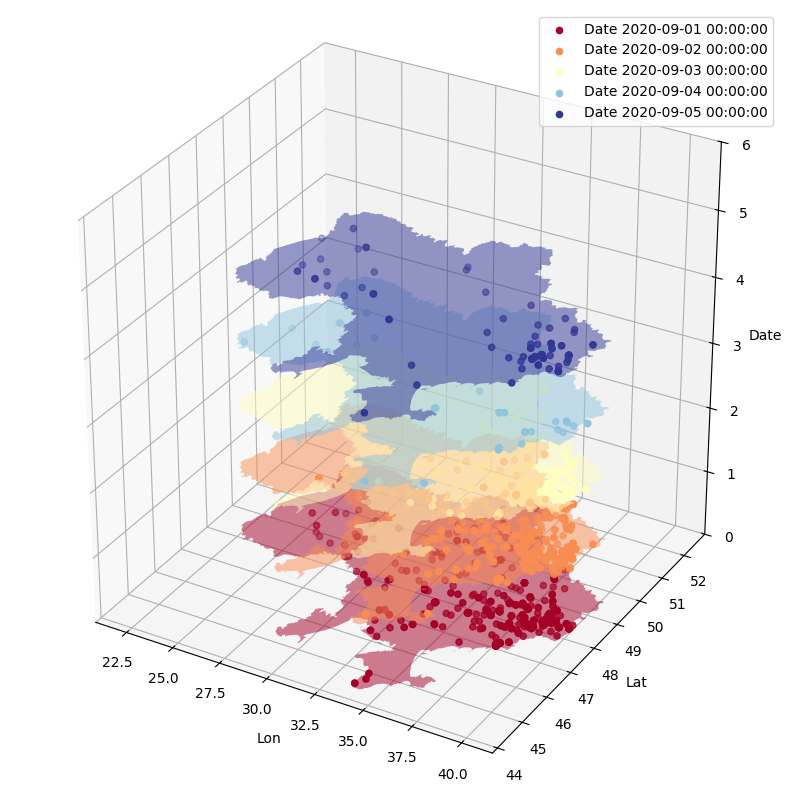

In [1629]:
temporal_scatter_w_poly(gdf, admin.iloc[0].geometry, n_dates=5, color_map="RdYlBu")

/tmp/ipykernel_35132/3583267435.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(color_map, n_dates)


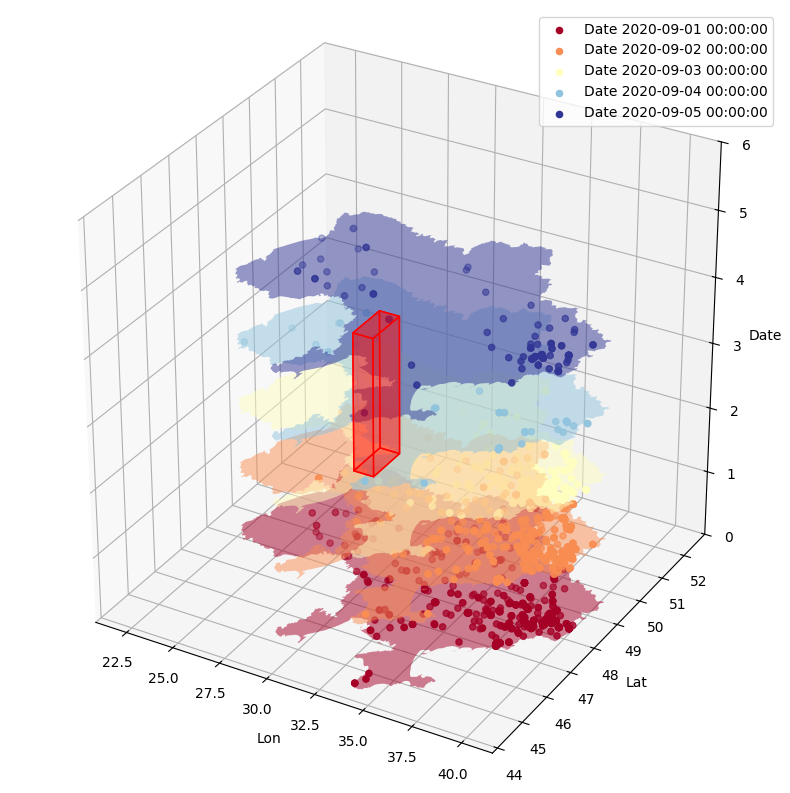

In [1630]:
box = make_box(33.0,45.0, 3, 1, 2)
temporal_scatter_w_poly(gdf, admin.iloc[0].geometry, n_dates=5, color_map="RdYlBu", box=box)

<Axes: >

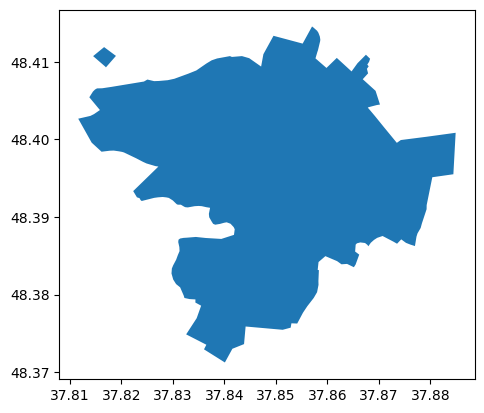

In [1631]:
gdf[gdf.a_location == 'Toretsk'].iloc[0:1].plot()

In [1632]:
import geopandas as gpd
from shapely.geometry import box
import numpy as np

def subdivide_polygon_into_grid(geom, cell_size, crs="EPSG:4326"):
    """
    Subdivide the bounding box of a (Multi)Polygon into square grid cells
    of the given cell size (in same units as geom CRS), and clip to geom.

    NOTE: this function written by gpt-4o
    TODO: insert link 
    """
    minx, miny, maxx, maxy = geom.bounds

    # Create grid of boxes
    x_coords = np.arange(minx, maxx, cell_size)
    y_coords = np.arange(miny, maxy, cell_size)

    cells = []
    for x in x_coords:
        for y in y_coords:
            cell = box(x, y, x + cell_size, y + cell_size)
            if geom.intersects(cell):
                clipped = geom.intersection(cell)
                if not clipped.is_empty:
                    cells.append(clipped)

    return gpd.GeoDataFrame(geometry=cells, crs=crs)


In [1633]:
gdf

,f_lat,f_lng,f_bright,f_scan,f_track,date,f_acqtime,f_sat,f_inst,f_conf,...,a_event,a_subevent,a_location,a_lat,a_lng,a_geoprec,h_adm_en,h_adm_ua,geometry,location
0,48.06239,37.60643,332.07,0.66,0.73,2024-07-28,1130,N21,VIIRS,n,...,Explosions/Remote violence,Air/drone strike,Vodyane,48.0960,37.6666,2.0,Ocheretynska,Очеретинська,"MULTIPOLYGON (((37.81759 48.36787, 37.81779 48...",POINT (37.60643 48.06239)
1,47.51498,35.83017,306.70,0.41,0.37,2024-07-09,2350,N20,VIIRS,n,...,Explosions/Remote violence,Air/drone strike,Novodanylivka,47.5242,35.8235,1.0,Novodanylivka,Новоданилівка,"MULTIPOLYGON (((35.81086 47.54522, 35.81271 47...",POINT (35.83017 47.51498)
2,51.60208,34.06103,297.22,0.47,0.40,2024-09-16,0013,N20,VIIRS,n,...,Explosions/Remote violence,Shelling/artillery/missile attack,Vovkivka,51.5200,34.2598,1.0,Shalyhynska,Шалигинська,"MULTIPOLYGON (((34.29189 51.48489, 34.28394 51...",POINT (34.06103 51.60208)
3,48.38680,37.84781,330.63,0.42,0.37,2024-08-15,1002,N20,VIIRS,l,...,Battles,Armed clash,Toretsk,48.3934,37.8453,2.0,Toretsk,Торецьк,"MULTIPOLYGON (((37.86815 48.4105, 37.86829 48....",POINT (37.84781 48.3868)
4,49.77481,37.71021,345.49,0.43,0.38,2023-09-22,1028,N,VIIRS,n,...,Explosions/Remote violence,Shelling/artillery/missile attack,Kucherivka,49.7182,37.6713,2.0,Petropavlivska,Петропавлівська,"MULTIPOLYGON (((37.9515 49.73075, 37.95159 49....",POINT (37.71021 49.77481)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135045,47.87373,33.41956,298.59,0.39,0.37,2021-09-12,2357,N,VIIRS,n,...,None,None,None,NaN,NaN,NaN,None,None,None,POINT (33.41956 47.87373)
135046,47.15536,37.56606,350.99,0.38,0.43,2020-09-12,1045,N,VIIRS,n,...,None,None,None,NaN,NaN,NaN,None,None,None,POINT (37.56606 47.15536)
135047,47.23802,31.74757,353.27,0.40,0.60,2020-09-20,1136,N,VIIRS,n,...,None,None,None,NaN,NaN,NaN,None,None,None,POINT (31.74757 47.23802)
135048,47.15641,37.53461,304.65,0.51,0.41,2021-03-04,2356,N,VIIRS,n,...,None,None,None,NaN,NaN,NaN,None,None,None,POINT (37.53461 47.15641)


In [1634]:
dates = sorted(gdf.date.unique())
print(dates[0])
print(dates[-1])
print(len(dates))


2020-09-01 00:00:00
2024-09-24 00:00:00
1313


## Dataset Transformation

Intuition suggests causality here over time at least and so we need our models to have access to the temporal dimension ... furnish that and implicitly address computational complexity by transforming the dataset into a 4d tensor that captures spatial dimension (x,y), temporal dimension (day/date) and k-features of the thermal anomaly. 

Input: 
- Geopandas dataframe with 120K+ events 

Output: 
- 4d numpy array of x,y,date,features

Configuration: 
- we must be able to stipulate: 
  - the length of the temporal window 
  - the bounding box of the lat long
  - the spatial grid cell size
- splits are a unique problem here, 
  - spatiotemporal holdout: create silos in time and space that ensure the likelihood of data leakage is lowered dramatically, split into train, val and test sets where each rectangular prism is isolated 
  - include configuration for block size
    - presume square spatial geometry
    - time/depth must be equal to spatial grid size, right? 
    - add spatial and temporal buffers to limit contamination
  - call this spatiotemporal cross validation (STCV)

In [1635]:
gdf.a_event.value_counts()

a_event
Explosions/Remote violence    38065
Battles                       25236
Strategic developments         3910
Violence against civilians      283
Protests                         24
Riots                             7
Name: count, dtype: int64

In [1636]:
gdf.a_subevent.value_counts()

a_subevent
Shelling/artillery/missile attack      27016
Armed clash                            24926
Air/drone strike                       10680
Disrupted weapons use                   3778
Remote explosive/landmine/IED            356
Non-state actor overtakes territory      310
Attack                                   256
Looting/property destruction             114
Sexual violence                           27
Protest with intervention                 24
Grenade                                   13
Arrests                                   12
Mob violence                               7
Headquarters or base established           6
Name: count, dtype: int64

In [1637]:
# These are runtime flags to dataset, which are memorialized and used during 
# training to ensure alignment and checked during testing to avoid exceptions durign prediction
story_width = 20 
story_depth = 7

In [1638]:
# Lat/lon increment to subdivide our spatial dimension by
# TODO: move to 0.001 when we implement sparse arrays
spatial_step = 0.05
spatial_step_km = 111 * spatial_step

# Day increment to subdividide our temporal dimension by 
temporal_step = 1

# Input features of the thermal anomaly we'll drive the prediction with 
feature_ixs = {
    'bright1': 0,  
    'bright2': 1,    
    'power': 2, 
    'night': 3, 
    'conf': 4, 
    'month': 5, 
    'count' : 6,
    'label' : 7
}

# Looking at above distribution of events, I'm not sure there's much value in distinguishing a 
# shelling/artillery/missile attack and an armed clash, for example. While ACLED makes a 
# distinction, I think the extra complexity of juggling these labels here out of the gate 
# isn't worht it. Let's just try to preduct the presence/absence of an event. 
label = { 
    'event' : 0, # true/false 
    'explosion' : 1, 
    'battle' : 2,
    # ... 
}

In [1639]:
import math 

min_lon, min_lat, max_lon, max_lat = admin.iloc[0].geometry.bounds
lon_range = max_lon - min_lon
lat_range = max_lat - min_lat
max_date = gdf.date.max()
min_date = gdf.date.min()
time_range = (max_date - min_date).days

lon_steps = int(math.floor(lon_range/spatial_step)) + 1
lat_steps = int(math.floor(lat_range/spatial_step)) + 1
time_steps = int(math.floor(time_range/temporal_step)) + 1
print(lon_steps, lat_steps, time_steps)

362 160 1485


In [1640]:
time_range/temporal_step 

1484.0

In [1641]:
(max_date-min_date).days

1484

In [1938]:
lattice = np.zeros((lon_steps, lat_steps, time_steps, len(feature_ixs)))

In [1939]:
gdf['conf_d'] = gdf.f_conf.apply(lambda x: 0.25 if x == 'l' else 0.5 if x == 'n' else 0.75)
gdf['night_d'] = gdf.f_daynight.apply(lambda x: 0 if x == 'D' else 1)

In [1940]:
lattice.shape

(362, 160, 1485, 8)

In [1941]:
print(f"Discretizing dataset at {spatial_step} decimal degree ({spatial_step_km:.2f} km) and {temporal_step} day resolution. This will create a grid of {lon_steps} x {lat_steps} x {time_steps} ({lon_steps * lat_steps * time_steps:,} cells).")
print(f"Training aperture will be {story_width} steps square ({story_width * spatial_step_km:.2f} km total and {story_depth} steps long ({story_depth} days)).")

Discretizing dataset at 0.05 decimal degree (5.55 km) and 1 day resolution. This will create a grid of 362 x 160 x 1485 (86,011,200 cells).
Training aperture will be 20 steps square (111.00 km total and 7 steps long (7 days)).


In [1942]:
from tqdm import tqdm 
import pandas as pd 

for i, row in tqdm(gdf.iterrows(), total=len(gdf)): 
    
    # Scale in decimal degrees and days based on our step values
    x = int((row.f_lng - min_lon)/spatial_step) 
    y = int((row.f_lat - min_lat)/spatial_step)
    d = int((row.date - min_date).days/temporal_step)

    # Make a new feature vector
    label = -1 if pd.isnull(row.a_event) else 1
    feature = [row.f_bright, row.f_bright31, row.f_frp, row.night_d, row.conf_d, row.date.month, 1, label]

    # Aggregate. Ideally this only happens once and only a single feature gets recorded per 
    # cell, but collisions happen often enough at large cell sizes that we need a general strategy. 
    # Conflict events here are sticky, if it was seen once in the cell, it will always be part of the positive 
    # class. 
    count = lattice[x, y, d][feature_ixs['count']]
    lattice[x, y, d] = (lattice[x, y, d] * count + feature) / (count + 1)
    lattice[x, y, d][feature_ixs['label']] = label
    lattice[x, y, d][feature_ixs['count']] = count + 1
    

100%|██████████| 135050/135050 [00:04<00:00, 27489.74it/s]


In [1943]:
(row.f_lng - min_lon)/0.001

10590.687704999944

<Axes: >

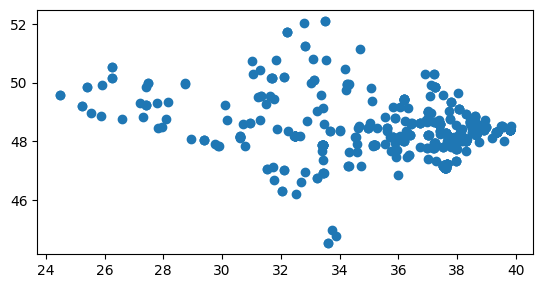

In [1944]:
gdf.set_geometry('location', inplace=True)
gdf[gdf.date==min_date].plot()

In [1945]:
def plot_story(story, start=None, end=None, heatmap=False):
    """
    Plot a map of events from our 4d story lattice given a time range to 
    subset on
    """
    counts = None 
    if start is not None and end is not None: 
        counts = story[:, :, start:end, feature_ixs['count']]
    else: 
        counts = story[:, :, :, feature_ixs['count']]
    
    # TODO: add label-specific colors? 
    #if len(story[0,0,0]) - 1 >= feature_ixs['label']:         
    
    counts = np.sum(counts, axis=2)
    x0, y0 = np.nonzero(counts)
    values = counts[x0,y0]
    
    kwargs = { 'c': values, 'cmap': 'magma' } if heatmap else {}

    plt.scatter(x0, y0, **kwargs)

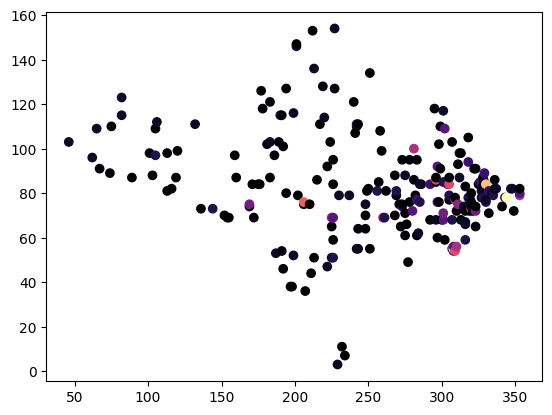

In [1946]:
plot_story(lattice, start=0, end=1, heatmap=True)

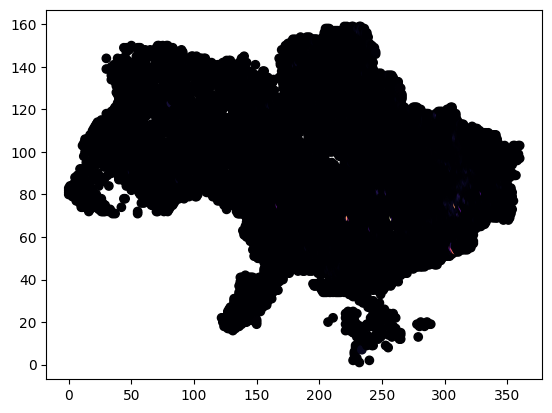

In [1947]:
plot_story(lattice, heatmap=True)

## Splits

We need a way to split these up without leaking data and without creating blindspots in the models. Spatiotemporal blocking and cross-validation which we can assign randomly to train, val, test splits seems ideal for promoting model ability and ensuring fair evaluation. 
- If the story dimensions are narrower than the whole dataset, the model input size won't accommodate real-world data which should include detections across the entire country
  - Are stories just for cross-validation and once we have an idea of performance, we retrain on the whole dataset? So our stories would disappear during final training and testing, which implies the test set is purely a temporal split, like the last 30 days of the quiescent period and the last 30 days of the war?
    - If we're going to test like this, doesn't it undermine the validation strategy and the story concept? Why wouldn't we just split val data similarly? Even if we have a minor benefit to cross validation with stories, it's like the model is actually going to need different hyperparameters to optimize on those smaller sets than it would on the global set... 
      - actually, worse, the neural network geometry would also need to be tuned to the resolution of the story and then revised for testing... defeating the entire purpose of cross validation. We would need to devise a new scheme to validate the model trained on all data!
  - This is akin to cross-validating an image classifier on a fraction of the pixels it would ultimately see in a classificaion task... even if the model could dynamically adapt to different input sizes, and we waive our hands at the hyperparameters like filter size, network depth, etc... why would we expect a great classifier of toes to be a great classifier of a whole scene? The latter doesn't necessarily follow from the former and we're significantly complicating the solution design by assserting it as a requirement. 
  - ❗️ add this discussion to the presentation and slides
    - So, why did we opt for spatiotemporal splits instead of just temporal splits in the first place?
      - because we pass labels during training! if we don't do a spatiotemporal split, those labels can taint our evaluation 
      - well, we dont want to vomit all of the training data in one blob... just as we need the spatial dimension to be stable, we also need the temporal dimension (of the train/val/test data) to remain constant. clearly we're not going to expect two years worth of detections for every prediction (which is what we'll probably have for training). we need to define what a single training item (and perhaps batch) are! these must be the same dimension as our prediction input.
        - 30 days? so training set is rolling 30 days windows of all detections
      - even if we don't care about tainting, or want to rely on a significant time buffer, we are creating a problem when we collapse our 120000 datapoints down to 1400 layers of detections. if we are going to pass 30 days at a time to training, then we have less than 1400 training samples suddenly, even with extreme overlap in these samples. 
        - perhaps instead of making the model country-wide, we aim for locality and try to (potentially to our benefit) learn only patterns that apply locally. this reduces the model's ability to just regurgigate lats/longs of conflict hotspots and it massively increases the number of training stories we have by retreating to the 'story' concept, which is inherently local. 
        - FUUUU.... constraining the spatial dimension destroys the spatial reference outside of the story. the eastern steppes look exactly like the western taiga to the model, no residual evidence of global location ... this would be a full retreat on global insights. the model would be relying on information exclusively within the space it's tracking. 
          - this invariance is a useful property, but the loss of country-wide detail is a major drawback ... run with it and talk to this in the challenges? 
            - yeah, i think this is more pro than con. the ability of the models to just memorize lats/longs is a problem and a threat to any interesting results

❗️ Implement the story concept here, decomposing the full training set into n sets of square spatial patches that run 30 days (configurable) deep. vary them for validation and test. for training, allow them to overlap. 
- the story should, instead of copying everything,  just store the date range (temporal span), x/y range (spatial span) and type of dataset (test/train ... latter can overlap, former can't). when the client wants access, we slice out a dense copy or view (particularly relevant if we store the underlying data as a sparse tensor)
- note we can vary and overlap not just in time, but in space! we should, or can anywa, permute many different stories by just sliding the corner of the box around!
- story geometry must be locked in at dataset construction time and carried over into training!
- stories should exist for quiescent period and during the war, but not overlap! 
- labels must be recorded somewhere!! inline is dangerous but perhaps efficient. our stories objects could detach the labels and then assign them back after training and before scoring is done. 

In [1948]:
# This should become an object
story = { 
    'start': 0,
    'depth': story_depth * 5, 
    'x': 167,
    'y': 135, 
    'width': story_width * 5,
    'type': 'train'
}

In [1949]:
# Leverage numpy slicing across dimensions to quickly extract a view into the story
val = lattice[
    story['x']:story['x'] + story['width'], 
    story['y']:story['y'] + story['width'], 
    story['start']:story['start']+story['depth'],
    :]
val.shape

(100, 25, 35, 8)

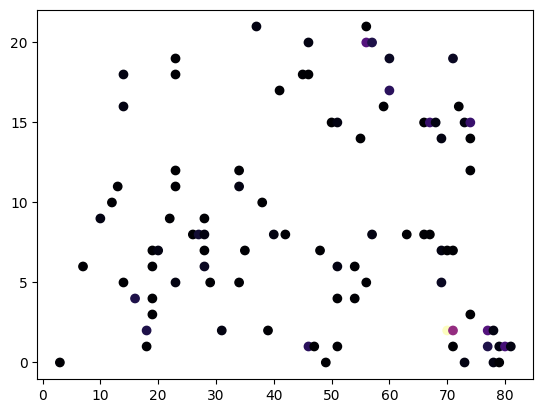

In [1950]:
# Show our subset of cells
plot_story(val, heatmap=True)

In [1951]:
# val is misleading, that just one of a number of stories we need to preserve... same for training and test, which are just 
# lists of stories we can pass sequentially to our training routines

In [1952]:
import pandas as pd
transition_period = (pd.Timestamp(year=2022, month=2, day=1), pd.Timestamp(year=2022, month=2, day=23))
transition_period

(Timestamp('2022-02-01 00:00:00'), Timestamp('2022-02-23 00:00:00'))

In [1953]:
quiescent_days = (transition_period[0] - min_date).days
conflict_days = (max_date - transition_period[1]).days 

In [1954]:
print(f"Anomaly data ranges from {gdf.date.min()} - {gdf.date.max()}. Ignoring the escalation period from {transition_period[0]} - {transition_period[1]}, there are {quiescent_days} days of data before the war and {conflict_days} days of data following the invasion.") 

Anomaly data ranges from 2020-09-01 00:00:00 - 2024-09-24 00:00:00. Ignoring the escalation period from 2022-02-01 00:00:00 - 2022-02-23 00:00:00, there are 518 days of data before the war and 944 days of data following the invasion.


In [1955]:
lattice.shape

(362, 160, 1485, 8)

In [1956]:
class Story():
    """
    Abstract the notion of a 'story', which is a contiguous spatiotemporal block of feature data, culminating (temporally) 
    in a labeled conflict event we can use for training or validation of a conflict event prediction.
    """

    def __init__(self, depth, width, t=0, x=0, y=0,type='train'): 
        """
        Create a new story! 
        """
        self.depth = depth 
        self.width = width 

        self.t = t        
        self.x = x 
        self.y = y 
        
        self.type = type

    def __str__(self): 
        return f"t: {self.t}\nx:{self.x}\ny:{self.y}"

In [1957]:
t_range = list(range(0, quiescent_days - 1 - story_depth))
x_range = list(range(0, lattice.shape[0] - story_width))
y_range = list(range(0, lattice.shape[1] - story_width))

In [1958]:
import random

In [1959]:
ixs = np.nonzero(lattice[:, :, :, feature_ixs['label']])
len(ixs[0])

48709

In [1960]:
random.choice(range(0, len(ixs[0])))

14749

In [1961]:
n_quiescent_stories = 1000000
n_conflict_stories = 1000000
stories = np.zeros((n_quiescent_stories + n_conflict_stories, 3), dtype=np.int32)

x_max = lattice.shape[0]
y_max = lattice.shape[1]

# Boundaries for the negative class - we must have enough room for priors and we have to cut off by the transition 
n_start = 0 + story_depth
n_end = ((transition_period[0]) - min_date).days

# Boundaries for the positive class - must start after the transition and end before we run out of data!
p_start = ((transition_period[1]) - min_date).days
p_end = (max_date - min_date).days

print(f"Sampling {n_quiescent_stories} stories from the pre-war period ({min_date} - {transition_period[0]}, {quiescent_days} days total) and {n_conflict_stories} stories from the post-invasion period {transition_period[1]} - {max_date}.")

ixs = np.nonzero(lattice[:, :, :, feature_ixs['label']])

Sampling 1000000 stories from the pre-war period (2020-09-01 00:00:00 - 2022-02-01 00:00:00, 518 days total) and 1000000 stories from the post-invasion period 2022-02-23 00:00:00 - 2024-09-24 00:00:00.


In [1962]:
def randomize_coords(x, x_max, y, y_max): 
    x = random.randrange(max(0, x - story_width), min(x_max, x + story_width))
    y = random.randrange(max(0, y - story_width), min(y_max, y + story_width))

    return x, y

In [1963]:
quiescent = 0 
conflict = 0 

# Sample stories with variation in the spatial aperture until our counters are full.  This 
# accomplishes class balance and allows scaling to arbitrary dataset size. 
with tqdm(total = n_quiescent_stories + n_conflict_stories) as progress: 
    while quiescent + conflict < n_quiescent_stories + n_conflict_stories: 

        i = random.randrange(0, len(ixs[0]))
        x = ixs[0][i]
        y = ixs[1][i]
        t = ixs[2][i]
        candidate = lattice[x,y,t]

        # TODO: migrate back to floats and use 0 here
        if candidate[feature_ixs['label']] == -1:
            if quiescent < n_quiescent_stories: 
                if t >= n_start and t < n_end: 
                    x, y = randomize_coords(x, x_max, y, y_max)            
                    stories[quiescent + conflict] = [x,y,t]
                    quiescent += 1
                    progress.update(1)
        
        elif candidate[feature_ixs['label']] == 1:
            if conflict < n_conflict_stories: 
                if t >= p_start and t < p_end: 
                    x, y = randomize_coords(x, x_max, y, y_max)                
                    stories[quiescent + conflict] = [x,y,t]
                    conflict += 1
                    progress.update(1)
        else: 
            raise ValueError(f"Unknown label encountered when selecting stories: {candidate[7]}!")

100%|██████████| 2000000/2000000 [00:05<00:00, 397809.72it/s]


In [1964]:
stories[1:10]

array([[ 239,   68,  346],
       [ 319,  114,  421],
       [ 280,   87,  698],
       [ 147,  107,  291],
       [ 296,   86, 1446],
       [ 235,  128,  314],
       [ 157,   67,  356],
       [ 273,   83, 1374],
       [ 220,   48,  345]], dtype=int32)

(array([  363.,   471.,   542.,   623.,   642.,   701.,   756.,   769.,
          876.,   945.,   939.,   954.,  1003.,  1020.,  1131.,  1263.,
         1296.,  1394.,  1484.,  1514.,  1638.,  1649.,  1867.,  2128.,
         2668.,  2970.,  3478.,  3479.,  3716.,  3851.,  4046.,  4171.,
         4611.,  4698.,  5499.,  6380.,  6767.,  7141.,  7178.,  7480.,
         7737.,  7837.,  8284.,  8830.,  9399.,  9684., 10007., 10294.,
        10923., 13592., 13948., 14873., 15582., 16570., 17882., 19291.,
        20356., 21663., 22502., 23302., 23767., 25134., 26268., 26626.,
        27091., 27530., 28186., 28052., 28417., 29176., 29337., 30114.,
        30889., 31204., 30592., 30693., 30682., 30965., 30863., 30955.,
        31075., 31070., 31062., 31264., 30739., 30481., 30507., 30542.,
        30594., 28253., 27968., 27212., 27040., 25918., 25061., 23811.,
        22993., 21957., 21831., 21075., 20633., 19287., 18234., 17954.,
        16802., 16440., 15995., 15033., 14778., 14402., 13805., 

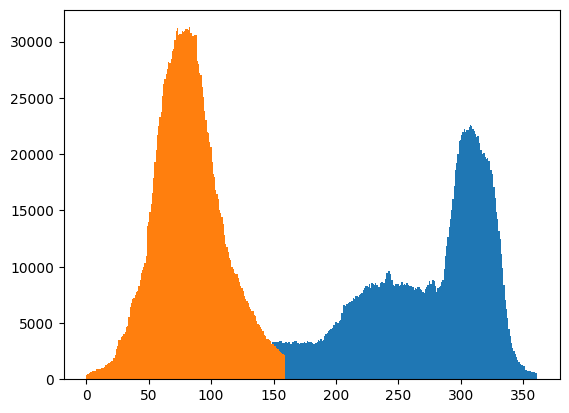

In [1965]:
plt.hist(stories[:,0], bins=x_max)
plt.hist(stories[:,1], bins=y_max)

(array([3011., 4195., 4391., ..., 4275., 3406., 3527.]),
 array([   7.        ,    7.99460916,    8.98921833, ..., 1481.01078167,
        1482.00539084, 1483.        ]),
 <BarContainer object of 1484 artists>)

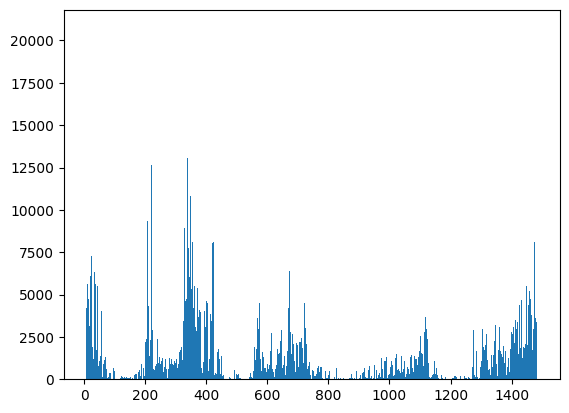

In [1966]:
plt.hist(stories[:,2], bins=(max_date - min_date).days)

In [1967]:
# We need to isolate the testing data... write a function to clean anything that intersects with a given story, then we can randomly assign stories to new stages and clean offending stuff out

stories[0:10]

array([[ 322,   60,  778],
       [ 239,   68,  346],
       [ 319,  114,  421],
       [ 280,   87,  698],
       [ 147,  107,  291],
       [ 296,   86, 1446],
       [ 235,  128,  314],
       [ 157,   67,  356],
       [ 273,   83, 1374],
       [ 220,   48,  345]], dtype=int32)

In [1968]:
test_story = stories[4].copy()
test_story

array([147, 107, 291], dtype=int32)

In [1969]:
len(stories)

2000000

In [1970]:
intersection = (
    (stories[:,0]>=test_story[0]) & 
    (stories[:,0]<=(test_story[0]+story_width)) & 
    (stories[:,1]>=test_story[1]) & 
    (stories[:,1]<=(test_story[1]+story_width)) & 
    (stories[:,2]>=test_story[2]) & 
    (stories[:,2]<=(test_story[2]+story_depth))
    )

In [1971]:
intersectees = stories[intersection]
len(intersectees)

64

In [1972]:
# update the story list by dropping any offending stories (except the one that induced the update)
stories[intersection] = -1

In [1973]:
# Should see 3*above nans (one for each value in the second dim) 
len(stories[stories==-1]) 

192

In [1974]:
stories[0:20]

array([[ 322,   60,  778],
       [ 239,   68,  346],
       [ 319,  114,  421],
       [ 280,   87,  698],
       [  -1,   -1,   -1],
       [ 296,   86, 1446],
       [ 235,  128,  314],
       [ 157,   67,  356],
       [ 273,   83, 1374],
       [ 220,   48,  345],
       [ 273,   78,   10],
       [ 132,   64,  409],
       [ 260,  122,  210],
       [  57,   91,  221],
       [ 199,   65, 1050],
       [ 217,   51,  239],
       [ 324,  103,  569],
       [ 183,   81,  218],
       [ 187,   35,  332],
       [ 329,  118,  329]], dtype=int32)

In [1975]:
# But... restore the story in question
stories[4] = test_story 
stories[0:20]

array([[ 322,   60,  778],
       [ 239,   68,  346],
       [ 319,  114,  421],
       [ 280,   87,  698],
       [ 147,  107,  291],
       [ 296,   86, 1446],
       [ 235,  128,  314],
       [ 157,   67,  356],
       [ 273,   83, 1374],
       [ 220,   48,  345],
       [ 273,   78,   10],
       [ 132,   64,  409],
       [ 260,  122,  210],
       [  57,   91,  221],
       [ 199,   65, 1050],
       [ 217,   51,  239],
       [ 324,  103,  569],
       [ 183,   81,  218],
       [ 187,   35,  332],
       [ 329,  118,  329]], dtype=int32)

In [1976]:
# Then drop all the other stories that were zeroed out
stories = stories[~intersection]
len(stories)

1999936

HOHO MY -- this destroys our indexing scheme (indices higher than those rows that are removed get moved lower!) does this need to be operated on within the context of a dataframe?  hmm... well, that just means we need to  collect all of our train, test and validation cases before passing out references (which are necessarily indices here) to these things?  so... build all stories, generate splits, calculate intersections and destroy all nans before creating collections of stories for train, test, val (which are lists of indices i guess)

In [1977]:
n = 4
story = Story(depth=story_depth, width=story_width, x=stories[n][0], y=stories[n][1], t=stories[n][2])
print(story) 


t: 1446
x:296
y:86


In [1990]:
feature_ixs

{'bright1': 0,
 'bright2': 1,
 'power': 2,
 'night': 3,
 'conf': 4,
 'month': 5,
 'count': 6,
 'label': 7}

In [2011]:
def densify_story(data, story): 
    """
    Retrieve a dense representation of the story, sans labels
    """

    # Leverage numpy slicing across dimensions to quickly extract a view into the story from the 
    # core array object, dropping the label from the feature vector. 
    dense = data[
        story.x : story.x + story.width, 
        story.y : story.y + story.width, 
        story.t : story.t + story.depth,
        0:feature_ixs['count'] + 1
        ]
    return dense 

def label_story(data, story): 
    """
    Retrieve a dense array of labels for the provided story
    """
    
    # Slice out the last day of features for this story (predicting the classification of a cell 
    # on the last day is always our target). Note this drops the third dimension, so we emit a 
    # width x width matrix of scalar labels. I.e. every cell has it's own label. 
    dense = data[
        story.x : story.x + story.width, 
        story.y : story.y + story.width, 
        story.depth-1,
        feature_ixs['label']
        ]
    return dense 


In [2012]:
a = lattice[0:10, 0:10, 6, 7]
b = lattice[10:20, 10:20, 6, 7]

In [2013]:
a.shape

(10, 10)

In [2014]:
ds = densify_story(lattice, story)

In [2015]:
ds.shape

(20, 20, 7, 7)

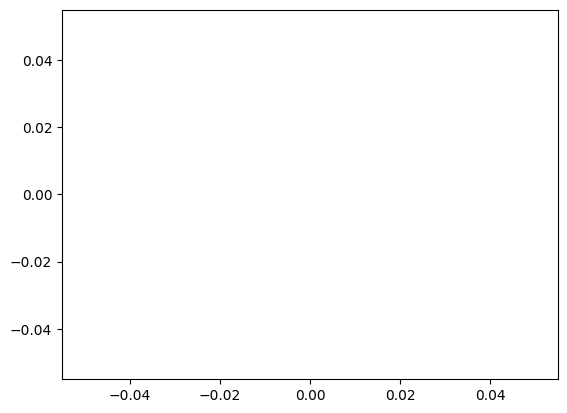

In [2016]:
plot_story(ds, heatmap=True)


## Naive modeling 

In [2017]:
nz = np.nonzero(ds)

In [2018]:
len(nz[0])

0

In [2019]:
ds.shape

(20, 20, 7, 7)

In [2020]:
# Dump nonzero labels
for i in range(0,len(nz[0])):
    print(nz[0][i], nz[1][i], nz[2][i], ds[nz[0][i], nz[1][i], nz[2][i]]) 

In [2021]:
s = np.sum(ds[1:2, 4:5, :], axis=2)
s.shape

(1, 1, 7)

In [2022]:
s

array([[[0., 0., 0., 0., 0., 0., 0.]]])

In [2023]:
np.mean(ds, axis=2).shape

(20, 20, 7)

In [2024]:
totals = np.zeros((ds.shape[0], ds.shape[1], ds.shape[3]))
                  
# Train the naive model 
for story in stories: 
    story = Story(depth=story_depth, width=story_width, x=story[0], y=story[1], t=story[2])
    ds = densify_story(lattice, story)

    totals = totals + np.sum(ds, axis=2)
    break 
    
model = np.divide(totals, len(stories))


In [2025]:
model.shape

(20, 20, 7)

In [2026]:
model

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [2027]:
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics.pairwise import cosine_similarity

def cosine_similarity(a, b): 
    """
    Return pairwise similarity between elements in passed arrays
    """
    similarity_matrix = cosine_similarity(a,b)
    pairwise_similarity = np.diag(similarity_matrix)[0]

    return float(pairwise_similarity)

def pearson_similarity(a, b):
    """
    Compute Pearson similarity
    """
    return (1 + pearsonr(a, b).statistic) / 2


In [2028]:
d = densify_story(lattice, story) 
l = label_story(lattice, story)

In [2029]:
d.shape

(20, 20, 7, 7)

In [2030]:
dm = np.mean(d, axis=2)
dm

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [2031]:
dm.shape

(20, 20, 7)

In [2032]:
l.shape

(20, 20)

In [2033]:
np.mean([l, l], axis=0).shape

(20, 20)

In [2045]:
# 'Train' the naive model 
def train_naive(lattice, stories): 
    """
    Train the naive model, which tries to characterizre the distribution of features it sees across every 
    cell furnished and all time steps (so we'll end up with story_width x story_width baselines) for each 
    class. During prediction we'll try to match the distribution and predict the class with the best match. 
    """

    # TODO: this needs to acecpt a dataset object instead of this hack. crucially, we need access 
    # to the story width & feature vector length which would presumably be easily cached in the dataset object
    features = np.zeros((story_width, story_width, feature_ixs['count'] + 1))    
    labels = np.zeros((story_width, story_width))    
    
    # Train the naive model 
    for story in stories: 
        
        # Maybe inlieu of instantiating these here, have the dataset class expose a make_story method which internally passes depth/width 
        # alternatively, skip the story object altogether, it's not adding any value here unless it's going to be doing range checking
        # etc for us
        story = Story(depth=story_depth, width=story_width, x=story[0], y=story[1], t=story[2])
        ds = densify_story(lattice, story)
        
        # TODO: we should be using np.nan in lieu of -1 for our 
        dl = label_story(lattice, story)
        
        # Gather the mean feature and label structure for each cell
        features = features + np.mean(ds, axis=2)

        # TODO: we are presuming anything that's not a positive label is a negative label and we can't really do that, we should only 
        # be averaging positive labels with negative labels, right? i.e. no reported information doesn't confirm a conflict event isn't 
        # present
        labels = labels + dl
        
    model = {}
    
    # Normalize
    model['features'] = np.divide(features, len(stories))
    model['labels'] = np.divide(labels, len(stories))

    return model 

In [2046]:
def predict_naive(lattice, model, stories): 
    
    preds = np.zeros((len(stories), story_width, story_width))
    for i, story in enumerate(stories): 

        story = Story(depth=story_depth, width=story_width, x=story[0], y=story[1], t=story[2])
        ds = densify_story(lattice, story)
        
        # Collapse the temporal dimension, leaving only a scalar (the mean) for each feature
        features = np.mean(ds, axis=2)       

        # Restrict our search for matching distributions to non-zero featuresets
        sample_ixs = np.nonzero(ds)
        model_ixs = np.nonzero(model['features'])
        scores = np.zeros((story_width, story_width))

        # For every non-zero feature, find the optimal match from our training distributions
        for sx, sy in zip(sample_ixs[0], sample_ixs[1]): 
            for mx, my in zip(model_ixs[0], model_ixs[1]):                     

                score = pearson_similarity(features[sx, sy], model['features'][mx, my])
                if score > scores[sx, sy]: 
                    print(f"Found better match ({score}) for cell {sx}, {sy}")
                    print(f"Compared {features[sx, sy]} with {model['features'][mx,my]}")
                    scores[sx, sy] == score
                    preds[i, sx, sy] = model['labels'][mx, my]

    return preds

In [2047]:
dm = np.mean(dense, axis=2)

In [2048]:
model = train_naive(lattice, stories[0:1])

In [2049]:
model['features']

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [2050]:
nm = np.nonzero(model['features']) 

In [2054]:
if len(nm[0]) > 0: 
    model['features'][nm[0][0], nm[1][0]]

In [2084]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
conflict_event_threshold = 0.3
score_ixs = {
    'precision': 0, 
    'recall' : 1, 
    'f1' : 2,
    'accuracy': 3
}

def evaluate_naive(stories, predictions):

    
    scores = np.zeros((len(stories), 4))
    
    # Iterate over all provided stories. Grab the ground truth and check the predictions
    # Note we don't penalize (or reward) for cells which we have no ground truth for... 
    for i, story in enumerate(stories): 

        story = Story(depth=story_depth, width=story_width, x=story[0], y=story[1], t=story[2])
        labels = label_story(lattice, story)
        label_ixs = np.nonzero(labels)
        
        y = labels[label_ixs].copy()
        y[y == -1] = 0

        y_hat = predictions[i][label_ixs]
                
        y_hat[y_hat >= conflict_event_threshold] = 1
        y_hat[y_hat < conflict_event_threshold] = 0

        scores[i][score_ixs['precision']] = precision_score(y, y_hat)
        scores[i][score_ixs['recall']] = recall_score(y, y_hat)
        scores[i][score_ixs['f1']] = f1_score(y, y_hat)
        scores[i][score_ixs['accuracy']] = accuracy_score(y, y_hat)

        print(y, y_hat)        
        print(f"Story {i} scores = {scores[i]}")

        

In [2056]:
labels = label_story(lattice, story)
lc = np.nonzero(labels)  
lc

(array([ 0,  4,  6,  7,  9, 16, 16, 17]),
 array([19,  8, 19, 12,  9, 12, 13, 13]))

In [2057]:
lc2 = (lc[0].copy(), lc[1].copy())
lc2[0][0] = 1
lc2[1][0] = 6

In [2058]:
preds = predict_naive(lattice, model, stories[1:2])

In [2067]:
y = [0., 1., 0., 0.]
y_hat = [0., 0., 0.4, 0.]

In [2068]:
roc_auc_score(y, y_hat)

0.33333333333333337

In [2085]:
evaluate_naive(stories[1:2], preds)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Story 0 scores = [0. 0. 0. 1.]


/home/grim/projects/school/flashpoint-detector/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/grim/projects/school/flashpoint-detector/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/grim/projects/school/flashpoint-detector/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(aver

## Classic/non-deep modeling 

Logistic regression with poor-man's convolutions... look at all adjacent cells, build a feature set, then train? ... but don't we need all the pixels in the story?  that's a lot of features! 

In [ ]:
from sklearn import linear

## Deep learning modeling 

Opt for local bias here on the intuition that locality has more relevance in fire and conflic than does global perspective. Acknowledge this is a weakeness. 